In [69]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
book = pd.read_csv("books.csv",encoding='latin-1')
#buff.decode(, 'ignore')

book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [72]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [74]:
df=book2.iloc[:200,1:]
df

,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,1
196,0,0,0,0,0,1,0,0,0,0
197,0,1,1,0,0,0,0,0,0,0
198,0,1,1,0,0,0,0,0,0,0


In [75]:
df2=pd.get_dummies(df)
df2.head()

,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0


In [76]:
df2.describe()

,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000
mean,0.235000,0.420000,0.280000,0.165000,0.220000,0.270000,0.0900,0.030000,0.055000,0.105000
std,0.425063,0.494797,0.450126,0.372112,0.415286,0.445074,0.2869,0.171015,0.228552,0.307323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000


In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   YouthBks   200 non-null    int64
 1   CookBks    200 non-null    int64
 2   DoItYBks   200 non-null    int64
 3   RefBks     200 non-null    int64
 4   ArtBks     200 non-null    int64
 5   GeogBks    200 non-null    int64
 6   ItalCook   200 non-null    int64
 7   ItalAtlas  200 non-null    int64
 8   ItalArt    200 non-null    int64
 9   Florence   200 non-null    int64
dtypes: int64(10)
memory usage: 15.7 KB


In [78]:
df2.isnull()

,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False


# Apriori Algorithm 

In [98]:
#frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=False)
#frequent_itemsets
frequent_items = apriori(df2, min_support = 0.05,max_len = 3, use_colnames = True)
frequent_items

,support,itemsets
0,0.235,(YouthBks)
1,0.420,(CookBks)
2,0.280,(DoItYBks)
3,0.165,(RefBks)
4,0.220,(ArtBks)
5,0.270,(GeogBks)
6,0.090,(ItalCook)
7,0.055,(ItalArt)
8,0.105,(Florence)
9,0.130,"(YouthBks, CookBks)"


In [99]:
frequent_items = apriori(df2, min_support = 0.1,max_len = 1, use_colnames = True)
frequent_items

,support,itemsets
0,0.235,(YouthBks)
1,0.420,(CookBks)
2,0.280,(DoItYBks)
3,0.165,(RefBks)
4,0.220,(ArtBks)
5,0.270,(GeogBks)
6,0.105,(Florence)


In [100]:
frequent_items = apriori(df2, min_support = 0.1,max_len = 2, use_colnames = True)
frequent_items

,support,itemsets
0,0.235,(YouthBks)
1,0.420,(CookBks)
2,0.280,(DoItYBks)
3,0.165,(RefBks)
4,0.220,(ArtBks)
5,0.270,(GeogBks)
6,0.105,(Florence)
7,0.130,"(YouthBks, CookBks)"
8,0.105,"(YouthBks, DoItYBks)"
9,0.100,"(YouthBks, GeogBks)"


In [101]:
rules = association_rules(frequent_items, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(CookBks),0.235,0.420,0.130,0.553191,1.317123,0.03130,1.298095
1,(CookBks),(YouthBks),0.420,0.235,0.130,0.309524,1.317123,0.03130,1.107931
2,(YouthBks),(DoItYBks),0.235,0.280,0.105,0.446809,1.595745,0.03920,1.301538
3,(DoItYBks),(YouthBks),0.280,0.235,0.105,0.375000,1.595745,0.03920,1.224000
4,(YouthBks),(GeogBks),0.235,0.270,0.100,0.425532,1.576044,0.03655,1.270741
5,(GeogBks),(YouthBks),0.270,0.235,0.100,0.370370,1.576044,0.03655,1.215000
6,(DoItYBks),(CookBks),0.280,0.420,0.190,0.678571,1.615646,0.07240,1.804444
7,(CookBks),(DoItYBks),0.420,0.280,0.190,0.452381,1.615646,0.07240,1.314783
8,(RefBks),(CookBks),0.165,0.420,0.120,0.727273,1.731602,0.05070,2.126667
9,(CookBks),(RefBks),0.420,0.165,0.120,0.285714,1.731602,0.05070,1.169000


In [102]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(RefBks),(CookBks),0.165,0.420,0.120,0.727273,1.731602,0.05070,2.126667
9,(CookBks),(RefBks),0.420,0.165,0.120,0.285714,1.731602,0.05070,1.169000
14,(DoItYBks),(ArtBks),0.280,0.220,0.105,0.375000,1.704545,0.04340,1.248000
15,(ArtBks),(DoItYBks),0.220,0.280,0.105,0.477273,1.704545,0.04340,1.377391
18,(ArtBks),(GeogBks),0.220,0.270,0.100,0.454545,1.683502,0.04060,1.338333
19,(GeogBks),(ArtBks),0.270,0.220,0.100,0.370370,1.683502,0.04060,1.238824
12,(CookBks),(GeogBks),0.420,0.270,0.185,0.440476,1.631393,0.07160,1.304681
13,(GeogBks),(CookBks),0.270,0.420,0.185,0.685185,1.631393,0.07160,1.842353
6,(DoItYBks),(CookBks),0.280,0.420,0.190,0.678571,1.615646,0.07240,1.804444
7,(CookBks),(DoItYBks),0.420,0.280,0.190,0.452381,1.615646,0.07240,1.314783


In [103]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(CookBks),0.235,0.420,0.130,0.553191,1.317123,0.03130,1.298095
1,(CookBks),(YouthBks),0.420,0.235,0.130,0.309524,1.317123,0.03130,1.107931
2,(YouthBks),(DoItYBks),0.235,0.280,0.105,0.446809,1.595745,0.03920,1.301538
3,(DoItYBks),(YouthBks),0.280,0.235,0.105,0.375000,1.595745,0.03920,1.224000
4,(YouthBks),(GeogBks),0.235,0.270,0.100,0.425532,1.576044,0.03655,1.270741
5,(GeogBks),(YouthBks),0.270,0.235,0.100,0.370370,1.576044,0.03655,1.215000
6,(DoItYBks),(CookBks),0.280,0.420,0.190,0.678571,1.615646,0.07240,1.804444
7,(CookBks),(DoItYBks),0.420,0.280,0.190,0.452381,1.615646,0.07240,1.314783
8,(RefBks),(CookBks),0.165,0.420,0.120,0.727273,1.731602,0.05070,2.126667
9,(CookBks),(RefBks),0.420,0.165,0.120,0.285714,1.731602,0.05070,1.169000


In [104]:
x = rules.support
y = rules.confidence

Text(0, 0.5, 'confidence')

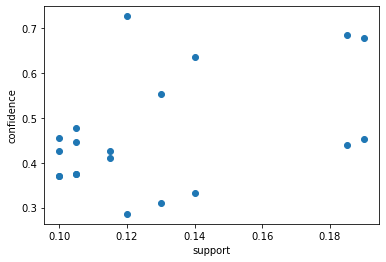

In [105]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlabel('support')
plt.ylabel('confidence')

(array([8., 2., 2., 2., 2., 0., 0., 0., 0., 4.]),
 array([0.1  , 0.109, 0.118, 0.127, 0.136, 0.145, 0.154, 0.163, 0.172,
        0.181, 0.19 ]),
 <BarContainer object of 10 artists>)

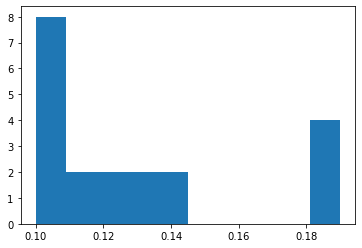

In [106]:
plt.hist(x)


(array([2., 3., 3., 6., 1., 0., 1., 1., 1., 2.]),
 array([0.28571429, 0.32987013, 0.37402597, 0.41818182, 0.46233766,
        0.50649351, 0.55064935, 0.59480519, 0.63896104, 0.68311688,
        0.72727273]),
 <BarContainer object of 10 artists>)

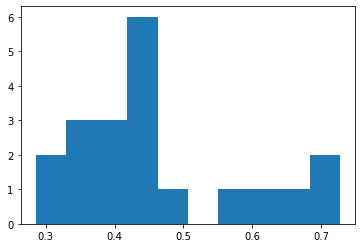

In [107]:
plt.hist(y)


{'whiskers': [<matplotlib.lines.Line2D at 0x5246250>,
 'caps': [<matplotlib.lines.Line2D at 0x5246580>,
 'boxes': [<matplotlib.lines.Line2D at 0x5246028>],
 'medians': [<matplotlib.lines.Line2D at 0x5246910>],
 'fliers': [<matplotlib.lines.Line2D at 0x5246ad8>],
 'means': []}

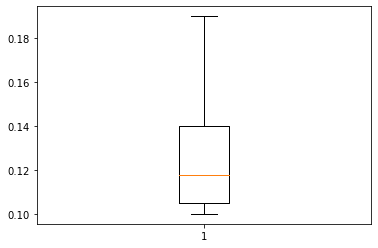

In [108]:
plt.boxplot(x)


{'whiskers': [<matplotlib.lines.Line2D at 0x527d040>,
 'caps': [<matplotlib.lines.Line2D at 0x527d3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x526fe50>],
 'medians': [<matplotlib.lines.Line2D at 0x527d760>],
 'fliers': [<matplotlib.lines.Line2D at 0x527d928>],
 'means': []}

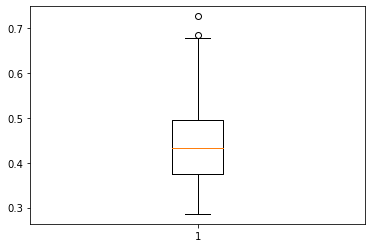

In [109]:
plt.boxplot(y)
